<a href="https://colab.research.google.com/github/guypary/ai-eng-nbs-public/blob/master/project_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Create visualizations of some images, and labels

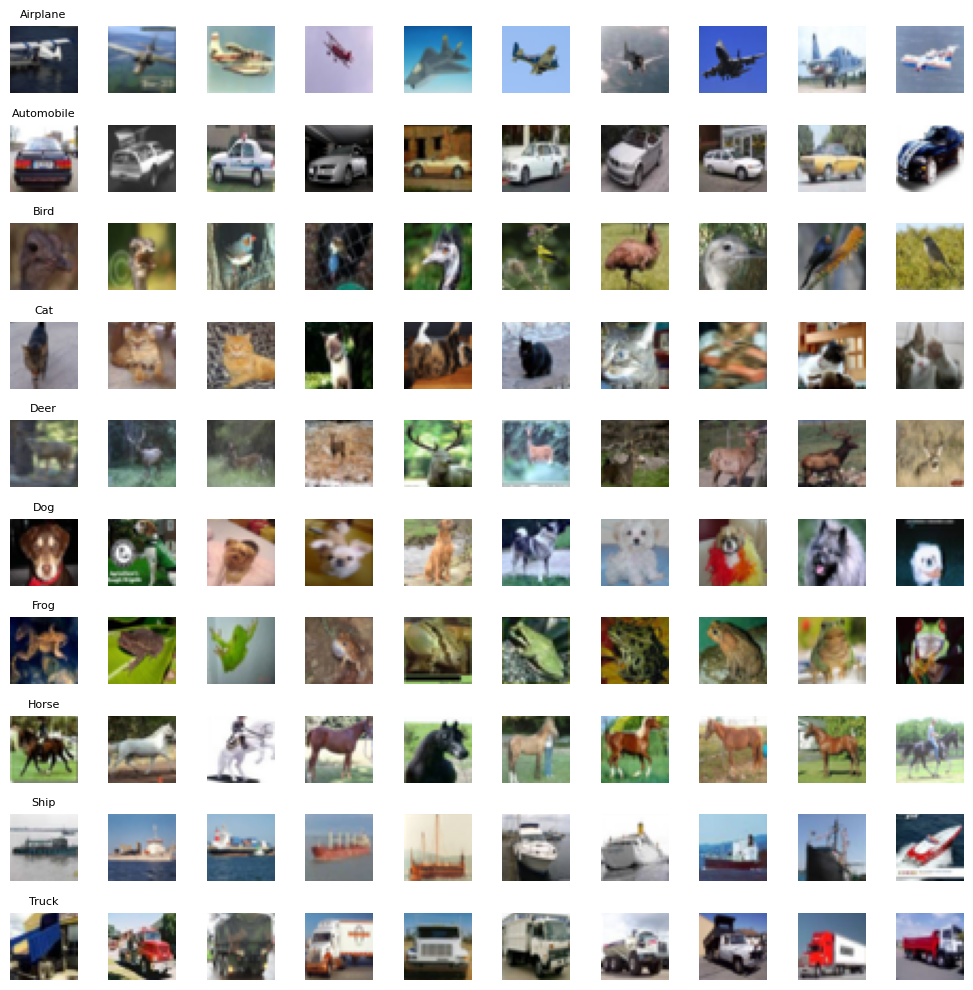

In [12]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Visualize the image
# Create a 10x10 plot with 10 random samples per class
plt.figure(figsize=(10, 10))  # Set the figure size

# Loop through all 10 classes
for class_index in range(10):
    # Find indices where the label matches the class index
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 10 samples from these indices
    random_indices = np.random.choice(class_indices, 10, replace=False)

    # Loop through these 10 samples
    for i, image_index in enumerate(random_indices):
        plt.subplot(10, 10, class_index * 10 + i + 1)  # Create a subplot
        plt.imshow(x_train[image_index])  # Show the image
        plt.axis('off')  # Turn off axis
        # Add class name for the first image in the row
        if i == 0:
            plt.title(class_names[class_index], fontsize=8)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

Convert labels to one-hot encoding

In [13]:
#Convert labels to one-hot encoding `to_categorical` converts labels like [0, 1, 2, ...] to one-hot encoded form

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


In [14]:
# Check the convertion of lanels to 0,1...
print(y_train_one_hot,"\n")
print(y_test_one_hot, )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [15]:
# Normalize the images
# Divide pixel values by 255 to scale them to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [16]:
# Print example to confirm normalization
print("Original pixel value (before normalization):", x_train[0][0][0])
print("Normalized pixel value:", x_train_normalized[0][0][0])

Original pixel value (before normalization): [59 62 63]
Normalized pixel value: [0.23137255 0.24313726 0.24705882]


Data augmentation

In [17]:
import tensorflow as tf

#Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# Fit the generator to the training data

Building a model

In [31]:

model = keras.Sequential(
    [

        keras.Input(shape=(32, 32, 3)),
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,746 (440.41 KB)

 Trainable params: 112,746 (440.41 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.

In [34]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=SGD(learning_rate=0.01),  # SGD optimizer with a learning rate of 0.01
    metrics=['accuracy']  # Metric to monitor during training
)

Training the model

In [36]:
history = model.fit(
    x_train_normalized,        # Normalized training images
    y_train_one_hot,           # One-hot encoded training labels
    epochs=50,                 # Number of epochs to train the model
    batch_size=100,            # Number of samples per batch
    validation_split = 0.1,     # Validation Split
    validation_data=(x_test_normalized, y_test_one_hot)  # Validation data (test set)
)

Epoch 1/50
 89/500 ━━━━━━━━━━━━━━━━━━━━ 4:00 586ms/step - accuracy: 0.1076 - loss: 2.3017

KeyboardInterrupt: 